In [65]:
# DB 함수용 임포트하기
import sys
sys.path.append("/mnt/nvme/CHP_data")

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

import matplotlib.pyplot as plt
from matplotlib import rc       
from process.creater_sql import CHPDataLoader
import seaborn as sns

rc('font', family='NanumGothic')               
plt.rcParams['axes.unicode_minus'] = False

In [67]:
# 강남 데이터셋 불러오기
df = CHPDataLoader(
    csv_path="",
    db_name="gangnam_CHP",
    table_name="heat_demand_table",
    user="zongseung",
    password="2213118",
    jar_path="/mnt/nvme/CHP_data/mysql-connector-j-8.3.0/mysql-connector-j-8.3.0.jar")

# 
df1 = df.load_from_mysql_with_spark(columns="heat_demand", lower=2021010101, upper=2023123123)

# SQL에서 불러오게 되면 정렬이 안되므로 .sort_values에 처리
df1.sort_values("date", inplace=True)

Initializing Spark session...
Reading from MySQL table `heat_demand_table` with partitioning...
Data loaded. Converting to pandas DataFrame...


In [68]:
df1

,branch,heat_demand,year,month,day,hour,date,ymd,imputated_temperature,season
224,강남,663,2021,1,01,01,2021-01-01 01:00:00,2021-01-01,-7.2,겨울
243,강남,656,2021,1,01,02,2021-01-01 02:00:00,2021-01-01,-7.6,겨울
267,강남,635,2021,1,01,03,2021-01-01 03:00:00,2021-01-01,-8.2,겨울
656,강남,622,2021,1,01,04,2021-01-01 04:00:00,2021-01-01,-8.1,겨울
717,강남,603,2021,1,01,05,2021-01-01 05:00:00,2021-01-01,-8.7,겨울
...,...,...,...,...,...,...,...,...,...,...
26274,강남,512,2023,12,31,19,2023-12-31 19:00:00,2023-12-31,1.4,겨울
26275,강남,539,2023,12,31,20,2023-12-31 20:00:00,2023-12-31,0.8,겨울
26276,강남,558,2023,12,31,21,2023-12-31 21:00:00,2023-12-31,0.4,겨울
26277,강남,556,2023,12,31,22,2023-12-31 22:00:00,2023-12-31,0.0,겨울


In [69]:
df_smp = pd.read_csv("/mnt/nvme/hybrid/powerdemand-prediction/powerdemand-prediction/EDA/TOE_smp.csv")

# 기간 슬라이싱
df_smp = df_smp[(df_smp["기간"]>="2021-01-01") & (df_smp["기간"]<="2023-12-31")]

In [70]:
df_smp["일시"] = pd.to_datetime(df_smp["일시"])

In [80]:
df_smp

,Unnamed: 0,date,Nuclear (kWh),Coal (kWh),Anthracite (kWh),Oil (kWh),LNG (kWh),기간,season,SMP,dubai,point_power,power demand(MW),종가_y,power demand_TOE
17544,17544,2021-01-01 00:00:00,6.105,44.4660,66.2030,139.941,70.456,2021-01-01,겨울,65.67,42.54,LNG,64942.0,14.30,5584.006879
17545,17545,2021-01-01 01:00:00,6.105,44.4660,66.2030,139.941,70.456,2021-01-01,겨울,67.53,42.54,LNG,62593.0,14.30,5382.029235
17546,17546,2021-01-01 02:00:00,6.105,44.4660,66.2030,139.941,70.456,2021-01-01,겨울,67.55,42.54,LNG,60905.0,14.30,5236.887360
17547,17547,2021-01-01 03:00:00,6.105,44.4660,66.2030,139.941,70.456,2021-01-01,겨울,66.74,42.54,LNG,59889.0,14.30,5149.527085
17548,17548,2021-01-01 04:00:00,6.105,44.4660,66.2030,139.941,70.456,2021-01-01,겨울,66.74,42.54,LNG,59638.0,14.30,5127.944970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43819,2023-12-31 19:00:00,6.421,89.6142,87.9026,341.542,152.245,2023-12-31,겨울,115.31,85.81,LNG,62902.0,11.52,5408.598452
43820,43820,2023-12-31 20:00:00,6.421,89.6142,87.9026,341.542,152.245,2023-12-31,겨울,120.72,85.81,LNG,62061.0,11.52,5336.285469
43821,43821,2023-12-31 21:00:00,6.421,89.6142,87.9026,341.542,152.245,2023-12-31,겨울,120.72,85.81,LNG,61403.0,11.52,5279.707653
43822,43822,2023-12-31 22:00:00,6.421,89.6142,87.9026,341.542,152.245,2023-12-31,겨울,120.72,85.81,LNG,61891.0,11.52,5321.668100


In [79]:
print(df_smp.columns)


Index(['Unnamed: 0', 'date', 'Nuclear (kWh)', 'Coal (kWh)', 'Anthracite (kWh)',
       'Oil (kWh)', 'LNG (kWh)', '기간', 'season', 'SMP', 'dubai', 'point_power',
       'power demand(MW)', '종가_y', 'power demand_TOE'],
      dtype='object')


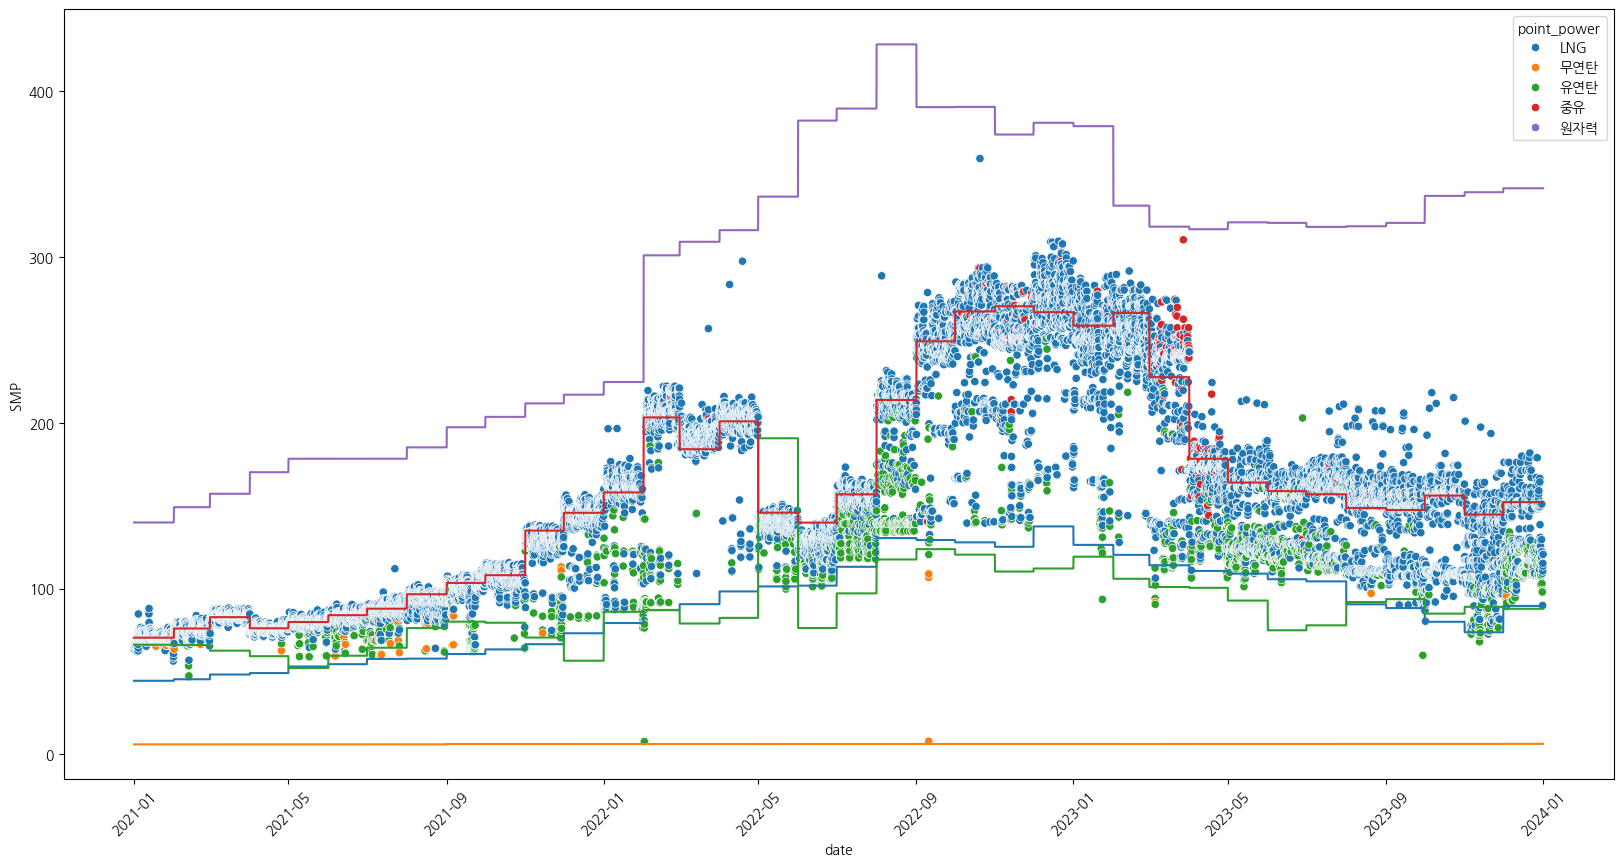

In [81]:
plt.figure(figsize=(20, 10))

sns.scatterplot(x="date", y="SMP", hue="point_power", data=df_smp)
plt.plot(df_smp["date"], df_smp["Coal (kWh)"]) # Nuclear (kWh)	Coal (kWh)	Anthracite (kWh)	Oil (kWh)	LNG (kWh)
plt.plot(df_smp["date"], df_smp["Nuclear (kWh)"])
plt.plot(df_smp["date"], df_smp["Anthracite (kWh)"])
plt.plot(df_smp["date"], df_smp["LNG (kWh)"])
plt.plot(df_smp["date"], df_smp["Oil (kWh)"])

plt.xticks(rotation=45)  
plt.show()

In [74]:
df_smp.rename(columns = {"일시" : "date"}, inplace=True)

In [75]:
total = pd.merge(df_smp[["date","SMP", "LNG (kWh)"]], df1, how = "outer", on = "date")
total.dropna(inplace=True)

In [76]:
total # 데이터 확인

,date,SMP,LNG (kWh),branch,heat_demand,year,month,day,hour,ymd,imputated_temperature,season
1,2021-01-01 01:00:00,67.53,70.456,강남,663.0,2021,1.0,01,01,2021-01-01,-7.2,겨울
2,2021-01-01 02:00:00,67.55,70.456,강남,656.0,2021,1.0,01,02,2021-01-01,-7.6,겨울
3,2021-01-01 03:00:00,66.74,70.456,강남,635.0,2021,1.0,01,03,2021-01-01,-8.2,겨울
4,2021-01-01 04:00:00,66.74,70.456,강남,622.0,2021,1.0,01,04,2021-01-01,-8.1,겨울
5,2021-01-01 05:00:00,67.72,70.456,강남,603.0,2021,1.0,01,05,2021-01-01,-8.7,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2023-12-31 19:00:00,115.31,152.245,강남,512.0,2023,12.0,31,19,2023-12-31,1.4,겨울
26276,2023-12-31 20:00:00,120.72,152.245,강남,539.0,2023,12.0,31,20,2023-12-31,0.8,겨울
26277,2023-12-31 21:00:00,120.72,152.245,강남,558.0,2023,12.0,31,21,2023-12-31,0.4,겨울
26278,2023-12-31 22:00:00,120.72,152.245,강남,556.0,2023,12.0,31,22,2023-12-31,0.0,겨울


In [77]:
# SQL에 저장
spark = SparkSession.builder.getOrCreate()
total_df_park = spark.createDataFrame(total)

(total_df_park.write.format("jdbc")
    .option("url", "jdbc:mysql://localhost:3306/gangnam_CHP")
    .option("dbtable", "heat_demand_with_smp")
    .option("user", "root")
    .option("password", "rockstar2580@")
    .option("driver", "com.mysql.cj.jdbc.Driver")
    .mode("overwrite")
    .save()
)